You are employed as a data scientist at the Open University (commonly known as OU). The OU is one of the largest UK universities (by student numbers) and is the pioneer of distance learning, it is known for its distance learning focus, accessibility to students with underprivileged backgrounds (both in the sense of societal and academic), wide range of degrees, and innovative technologies. The university has recently purchased a brand new virtual learning environment (VLE). You are tasked with providing scientific evidence for the following questions:

**Is the VLE improving students' grades?**


**Can we predict students' grades?**


Depending on the results of your analyses, we also want some actionable recommendations, such as actively promoting the VLE to students to improve grades or changing assessment types.

In order to do this, you will need to analyse the Open University Learning Analytics Dataset (it can be download here: OULAD.zip Download OULAD.zip). The OULAD is a extensive dataset containing information about some courses offered by the OU, a sample of their students (who have been anonymised), and the students' interactions with the new VLE. The dataset consists of the following 7 tables

1. courses.csv
2. assessments.csv
3. vle.csv
4. studentInfo.csv
5. studentRegistration.csv
6. studentAssesment.csv
7. studentVle.csv

In [ ]:
# Importing all the necessary libraries which is used in this report

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
import warnings
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 70)
%matplotlib inline

In [ ]:
def read_data(fname):
    return pd.read_csv(fname)

In [ ]:
#mentioning the file names
fname1 = 'courses.csv'
fname2 = 'assessments.csv'
fname3 = 'vle.csv'
fname4 = 'studentInfo.csv'
fname5 = 'studentRegistration.csv'
fname6 = 'studentAssessment.csv'
fname7 = 'studentVle.csv'

In [ ]:
# Load Files
df_course = read_data(fname1)
df_ass = read_data(fname2)
df_vle = read_data(fname3)
df_stud_info = read_data(fname4)
df_stud_reg = read_data(fname5)
df_stud_ass = read_data(fname6)
df_stud_vle = read_data(fname7)

### Data Cleaning and Wrangling

In [ ]:
# Creating 'module_presentation' column for required DataFrames
df_course['module_presentation'] = df_course['code_module'] + "_" + df_course['code_presentation']
df_ass['module_presentation'] = df_ass['code_module'] + "_" + df_ass['code_presentation']
df_vle['module_presentation'] = df_vle['code_module'] + "_" + df_vle['code_presentation']
df_stud_info['module_presentation'] = df_stud_info['code_module'] + "_" + df_stud_info['code_presentation']

### 1. Student registration

In [ ]:
df_stud_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


In [ ]:
df_stud_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   code_module          32593 non-null  object
 1   code_presentation    32593 non-null  object
 2   id_student           32593 non-null  int64 
 3   date_registration    32593 non-null  object
 4   date_unregistration  32593 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
#Checking for the duplicates
df_stud_reg[df_stud_reg.duplicated()]

,code_module,code_presentation,id_student,date_registration,date_unregistration


### 2. Student Info

In [ ]:
df_stud_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA_2013J
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA_2013J
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA_2013J
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA_2013J


In [ ]:
#Checking values in imd_band column
uniqueValues = df_stud_info['imd_band'].unique()
print(uniqueValues)

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' '?' '60-70%'
 '40-50%' '10-20' '0-10%']


In [ ]:
df_stud_info['imd_band'] = df_stud_info['imd_band'].replace(['10-20'], '10-20%')

In [ ]:
df_stud_info['imd_band'] = df_stud_info['imd_band'].replace(['10-20'], '10-20%')

In [ ]:
# #removing values from imd_band column when value is '?'
# df_stud_info =  df_stud_info[~(df_stud_info['imd_band']=='?')]
# #Removing 1111 rows

In [ ]:
df_stud_info['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', '?',
       '60-70%', '40-50%', '10-20%', '0-10%'], dtype=object)

In [ ]:
#Checking for the duplicates
df_stud_info[df_stud_info.duplicated()]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation


### 3. Merging Student Registration and Student Info data frames

In [ ]:
df_stud_info_reg = pd.merge(df_stud_info, df_stud_reg, on=['id_student', 'code_module','code_presentation'])

In [ ]:
#Checking the count of rows for each final result labels
df_stud_info_reg['final_result'].value_counts()

final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

In [ ]:
#Whenever a student has unregistered, his or her result should be 'Withdrawn'. Doing that below.
df_stud_info_reg['final_result'] = np.where(df_stud_info_reg['date_unregistration']!='?', 'Withdrawn',df_stud_info_reg['final_result'])

### 4. Assessments

In [ ]:
df_ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation
0,AAA,2013J,1752,TMA,19,10.0,AAA_2013J
1,AAA,2013J,1753,TMA,54,20.0,AAA_2013J
2,AAA,2013J,1754,TMA,117,20.0,AAA_2013J
3,AAA,2013J,1755,TMA,166,20.0,AAA_2013J
4,AAA,2013J,1756,TMA,215,30.0,AAA_2013J


In [ ]:
df_ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          206 non-null    object 
 1   code_presentation    206 non-null    object 
 2   id_assessment        206 non-null    int64  
 3   assessment_type      206 non-null    object 
 4   date                 206 non-null    object 
 5   weight               206 non-null    float64
 6   module_presentation  206 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.4+ KB


In [ ]:
df_ass[df_ass.duplicated()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation


In [ ]:
pd.set_option('display.max_rows', 200)

In [ ]:
#finding the weight per module presentation level.It should be same for all modules
df_ass.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

We can see that for **CCC** and **GGG** modules the total weight is not 200. We need to fix it.


Looking into assessment type level for these modules to see the weightage distribution

In [ ]:
df_ass_filtered = df_ass[df_ass['code_module'].isin(["CCC", "GGG"])]
df_ass_grouped = df_ass_filtered.groupby(
    ['code_module', 'code_presentation', 'assessment_type']
).agg(type_weights=('weight', 'sum')).reset_index()

We can see that for **CCC**, Exam has 200 weightage, it should be 100.


Also, for **GGG**, weight is assigned only for Exam which is 100. Let's add 100 weightage for TMA

In [ ]:
# Halve the weights of exams for the module 'CCC'
exam_filter = (df_ass['code_module'] == 'CCC') & (df_ass['assessment_type'] == 'Exam')
df_ass.loc[exam_filter, 'weight'] /= 2

In [ ]:
# Set the weights of TMA type assessments to 100% (distributed equally across three assessments)
tma_filter = (df_ass['code_module'] == 'GGG') & (df_ass['assessment_type'] == 'TMA')
df_ass.loc[tma_filter, 'weight'] = 100 / 3

### 5. Student Assessments

In [ ]:
df_stud_ass.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [ ]:
df_stud_ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_assessment   173912 non-null  int64 
 1   id_student      173912 non-null  int64 
 2   date_submitted  173912 non-null  int64 
 3   is_banked       173912 non-null  int64 
 4   score           173912 non-null  object
dtypes: int64(4), object(1)
memory usage: 6.6+ MB


In [ ]:
#Checking for duplicates
df_stud_ass[df_stud_ass.duplicated()]

,id_assessment,id_student,date_submitted,is_banked,score


### 6. Merging Assessments and Student Assessments data frames

In [ ]:
# Join the StudentAssessment and Assessment tables
joined_stu_ass_df = df_stud_ass.merge(df_ass, on='id_assessment', how='left')

In [ ]:
joined_stu_ass_df[joined_stu_ass_df['score']=='?'].shape

(173, 11)

In [ ]:
# Replace '?' with 0 in the 'score' column and convert to float. Assuming the student didnt attend the exam and hence zero score
joined_stu_ass_df['score'].replace('?', 0, inplace=True)
joined_stu_ass_df['score'] = joined_stu_ass_df['score'].astype(float)

In [ ]:
# Calculate weighted scores for all assessments of all students
joined_stu_ass_df['score*weight'] = joined_stu_ass_df['score'] * joined_stu_ass_df['weight']

# Calculate the final mark for all students by summing up score*weights and dividing by total weights
marks = joined_stu_ass_df.groupby(['id_student', 'code_module', 'code_presentation'], as_index=False)[
    ['score*weight', 'weight']].sum()

marks['adjusted_mark'] = marks['score*weight'] / marks['weight']

In [ ]:
marks.head()

,id_student,code_module,code_presentation,score*weight,weight,adjusted_mark
0,6516,AAA,2014J,6350.0,100.0,63.50
1,8462,DDD,2013J,3490.0,40.0,87.25
2,8462,DDD,2014J,4300.0,50.0,86.00
3,11391,AAA,2013J,8240.0,100.0,82.40
4,23629,BBB,2013B,1669.0,25.0,66.76


In [ ]:
#rename columns
marks.rename(columns={'score*weight': 'total_score*weight', 'weight': 'attempted_weight'}, inplace=True)
marks = marks.round(1)

# Merging it to student info table
joined = marks.merge(df_stud_info, on=['id_student', 'code_module', 'code_presentation'], how='left')

# Handling cases where student's final result is 'Withdrawn'
joined.loc[joined['final_result'] == 'Withdrawn', 'total_score*weight'] = np.nan
joined.loc[joined['final_result'] == 'Withdrawn', 'adjusted_mark'] = np.nan

In [ ]:
df = joined

### 7. Score - Result Alignment

There are cases in the dataset where mark and final result are not aligning. for example see below. Usually a distinction is when
a student scores a 70 or above

In [ ]:
df[(df['final_result']=='Distinction') & (df['adjusted_mark']<70)][['adjusted_mark', 'final_result']].head()

,adjusted_mark,final_result
412,63.3,Distinction
1663,68.3,Distinction
2370,66.7,Distinction
2550,67.7,Distinction
2616,66.7,Distinction


sum of the students total_weight value doesn't adds up to 200 . This implies that these students failed to attempt all of the assessment
or we don't have data for these assessments.


The main strategy involves deriving the adjusted_mark value based on the attempted_weight. A high attempted_weight suggests trusting
the adjusted_mark or mark, while a low attempted_weight indicates relying more on the final_result label.

If the `attempted_weight` is **200** and `adjusted_mark` is **70 or greater** then, the result should be **'Distinction'**

In [ ]:
df['final_result'] = np.where((df['attempted_weight']==200) & (df['adjusted_mark']>=70), 'Distinction', df['final_result'])

If the `attempted_weight` is **200** and `adjusted_mark` is **between 40 and 70** then, the result should be **'Pass'**

In [ ]:
cond1 = (df['attempted_weight']==200) & ((df['adjusted_mark']>=40) & (df['adjusted_mark']<70))

In [ ]:
df['final_result'] = np.where(cond1, 'Pass', df['final_result'])

In [ ]:
cond2 = (df['attempted_weight']==200) & ((df['adjusted_mark']>=0) & (df['adjusted_mark']<40))

In [ ]:
df['final_result'] = np.where(cond2, 'Fail', df['final_result'])

For **Passed** students with `attempted_weight` **between 150 to 200**,  `adjusted_mark` is **70 or above**, assign them **Distinction**.

In [ ]:
cond3 = ((df['attempted_weight']>=150) & (df['attempted_weight']<200) & (df['final_result']=='Pass') & (df['adjusted_mark']>=70))

In [ ]:
df['final_result'] = np.where(cond3, 'Distinction', df['final_result'])

For **Failed** students with `attempted_weight` **between 150 to 200**,  `adjusted_mark` is **40 or above**, assign them **Pass**.

In [ ]:
cond4 = ((df['attempted_weight']>=150) & (df['attempted_weight']<200) & (df['final_result']=='Fail') & (df['adjusted_mark']>=40) )

In [ ]:
df['final_result'] = np.where(cond4, 'Pass', df['final_result'])

For **Passed** students with `attempted_weight` **between 150 to 200**,  `adjusted_mark` is **less than 40**, assign them **Fail**.

In [ ]:
cond5 = ((df['attempted_weight']>=150) & (df['attempted_weight']<200) & (df['final_result']=='Pass') & (df['adjusted_mark']<40))

In [ ]:
df['final_result'] = np.where(cond5, 'Fail', df['final_result'])

- Adjusting the adjusted mark values

If the `attempted_weight` is **below 150**, there is high uncertainty in the "mark." In such cases, we will primarily rely on the `final_result` labels. These points will be sorted by their mark value, and their adjusted_mark values will be assigned while preserving this order.

In [ ]:
# Defining Condition
condition = (df['attempted_weight'] < 150.0) & (df['final_result'] == 'Distinction')

new_values = np.arange(70, 100, 30 / len(df[condition]))

# Assign new values
df.loc[condition, 'adjusted_mark'] = new_values

In [ ]:
# Defining Condition
condition = (df['attempted_weight'] < 150) & (df['final_result'] == 'Pass')


new_values = np.arange(40, 70, 30 / len(df[condition]))

# Assign the new values
df.loc[condition, 'adjusted_mark'] = new_values

In [ ]:
# Defining Condition
condition = (df['attempted_weight'] < 150) & (df['final_result'] == 'Fail')


new_values = np.arange(0, 40, 40 / len(df[condition]))

# Assign the new values
df.loc[condition, 'adjusted_mark'] = new_values



Checking if everything is aligned below

In [ ]:
#should return empty data frame
df[(df['final_result']=='Distinction') & (df['adjusted_mark']<70)]

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation


In [ ]:
cond3 = ((df['attempted_weight']>=150) & (df['attempted_weight']<200) & (df['final_result']=='Pass') & (df['adjusted_mark']>=70))
df['final_result'] = np.where(cond3, 'Distinction', df['final_result'])

In [ ]:
#should return empty data frame

df[(df['final_result']=='Pass') & (df['adjusted_mark']>=70)].sort_values(by='adjusted_mark')

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation


In [ ]:
#should return empty data frame
df[(df['final_result']=='Pass') & (df['adjusted_mark']<40)].sort_values(by='adjusted_mark')

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation


In [ ]:
#should return empty data frame
df[(df['final_result']=='Fail') & (df['adjusted_mark']>=40)].sort_values(by='adjusted_mark')

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation


Replace '?' from dataset

In [ ]:
df.replace('?',np.nan,inplace=True)

In [ ]:
#checking for nulls in the dataframe
df.isnull().sum()/len(df)*100

id_student               0.000000
code_module              0.000000
code_presentation        0.000000
total_score*weight      18.159656
attempted_weight         0.000000
adjusted_mark           18.159656
gender                   0.000000
region                   0.000000
highest_education        0.000000
imd_band                 3.861781
age_band                 0.000000
num_of_prev_attempts     0.000000
studied_credits          0.000000
disability               0.000000
final_result             0.000000
module_presentation      0.000000
dtype: float64

In [ ]:
#Checking for duplicates
df[df.duplicated()]

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation


**nulls** are present in `adjusted_mark` column and `total_score*weight` column because of students who have unregistered

 **1111** rows are null in `imd_band` column (Index of Multiple Depravation, an index for living condition), we will have to look into it later

In [ ]:
#Removing those rows from 'imd_band' columns
df = df[df['imd_band'].notna()]

### 8. Vle

In [ ]:
df_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to,module_presentation
0,546943,AAA,2013J,resource,?,?,AAA_2013J
1,546712,AAA,2013J,oucontent,?,?,AAA_2013J
2,546998,AAA,2013J,resource,?,?,AAA_2013J
3,546888,AAA,2013J,url,?,?,AAA_2013J
4,547035,AAA,2013J,resource,?,?,AAA_2013J


In [ ]:
df_vle.replace('?',np.nan,inplace=True)

In [ ]:
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_site              6364 non-null   int64 
 1   code_module          6364 non-null   object
 2   code_presentation    6364 non-null   object
 3   activity_type        6364 non-null   object
 4   week_from            1121 non-null   object
 5   week_to              1121 non-null   object
 6   module_presentation  6364 non-null   object
dtypes: int64(1), object(6)
memory usage: 348.2+ KB


Seems like `week_from` and `week_to` columns have many nulls,so it's better to drop these columns, Will not be of much use to us

In [ ]:
#Removing columns
df_vle.drop(['week_from','week_to'],axis=1,inplace=True)

In [ ]:
#Checking for duplicates
df_vle[df_vle.duplicated()]

,id_site,code_module,code_presentation,activity_type,module_presentation


### 9. Student Vle

In [ ]:
df_stud_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
df_stud_vle = df_stud_vle.drop_duplicates()

In [ ]:
df_stud_vle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868110 entries, 0 to 10655278
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 527.0+ MB


### 10. Merging Vle and Student Vle data frames

In [ ]:
df_stud_vle.shape

(9868110, 6)

In [ ]:
df_student_interaction = df_stud_vle.merge(df_vle,on=['code_module','code_presentation','id_site'],how="inner")

In [ ]:
df_student_interaction.replace('?',np.nan,inplace=True)

In [ ]:
#checking for nulls in the dataframe
df_student_interaction.isnull().sum()/len(df_student_interaction)

code_module            0.0
code_presentation      0.0
id_student             0.0
id_site                0.0
date                   0.0
sum_click              0.0
activity_type          0.0
module_presentation    0.0
dtype: float64

In [ ]:
df_student_interaction.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,module_presentation
0,AAA,2013J,28400,546652,-10,4,forumng,AAA_2013J
1,AAA,2013J,28400,546652,-10,1,forumng,AAA_2013J
2,AAA,2013J,28400,546614,-10,11,homepage,AAA_2013J
3,AAA,2013J,28400,546714,-10,1,oucontent,AAA_2013J
4,AAA,2013J,28400,546652,-10,8,forumng,AAA_2013J


Finding total clicks by a student for each module presentation

In [ ]:
df_student_interaction_sum = df_student_interaction.groupby(['id_student', 'code_module', 'code_presentation'], as_index=False)["sum_click"].agg(['sum', 'count'])

In [ ]:
df_student_interaction_sum.head()

,id_student,code_module,code_presentation,sum,count
0,6516,AAA,2014J,2715,625
1,8462,DDD,2013J,634,293
2,8462,DDD,2014J,9,3
3,11391,AAA,2013J,922,192
4,23629,BBB,2013B,153,51


In [ ]:
df_student_interaction_sum.shape

(29228, 5)

In [ ]:
df_student_interaction_sum[df_student_interaction_sum.duplicated()]

,id_student,code_module,code_presentation,sum,count


### 11. Merging student vle interaction data with student info data

In [ ]:
merged_df = df_student_interaction_sum.merge(df,
                                              on=['id_student', 'code_module', 'code_presentation'],
                                              how='inner')

In [ ]:
merged_df.drop('module_presentation',axis=1, inplace=True)

In [ ]:
merged_df.head()

,id_student,code_module,code_presentation,sum,count,total_score*weight,attempted_weight,adjusted_mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,6516,AAA,2014J,2715,625,6350.0,100.0,40.000000,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
1,8462,DDD,2013J,634,293,NaN,40.0,NaN,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
2,8462,DDD,2014J,9,3,NaN,50.0,NaN,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
3,11391,AAA,2013J,922,192,8240.0,100.0,40.003173,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,23629,BBB,2013B,153,51,1669.0,25.0,0.000000,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail


In [ ]:
#Removing rows with final_result value is 'Withdrawn' since it is not contributing towards our analysis
merged_df2 = merged_df[~(merged_df['final_result']=='Withdrawn')]

In [ ]:
#number of rows removed
merged_df2.shape[0]-merged_df.shape[0]

-4534

### Exploratory Data Analysis

In [ ]:
merged_df2.describe()

,id_student,sum,count,total_score*weight,attempted_weight,adjusted_mark,num_of_prev_attempts,studied_credits
count,2.026200e+04,20262.000000,20262.000000,20262.000000,20262.000000,20262.000000,20262.000000,20262.000000
mean,7.074975e+05,1635.964712,415.840539,7301.437282,102.233027,52.255003,0.148110,74.612082
std,5.527750e+05,1813.484842,367.232790,3743.727053,48.653930,23.680294,0.456407,36.772928
min,6.516000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,5.063308e+05,458.250000,151.000000,5333.300000,82.000000,39.000000,0.000000,60.000000
50%,5.890405e+05,1029.000000,306.000000,7324.500000,100.000000,54.195749,0.000000,60.000000
75%,6.422808e+05,2168.000000,570.000000,8769.500000,100.000000,67.708598,0.000000,90.000000
max,2.698588e+06,23513.000000,2951.000000,19790.000000,200.000000,100.000000,6.000000,630.000000


Text(0.5, 0, '')

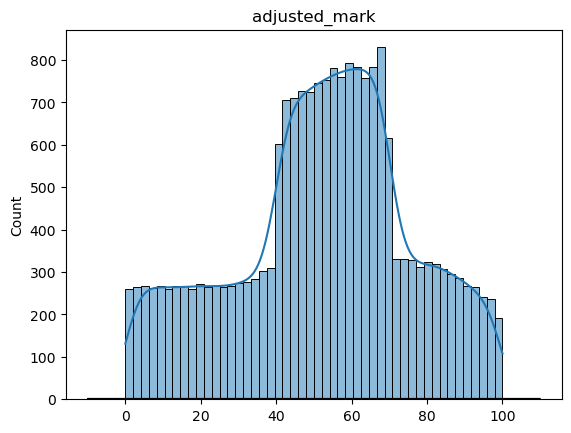

In [ ]:
# Plotting adjusted_mark and checking the distribution
fig, ax = plt.subplots()
sns.histplot(data=merged_df2,x='adjusted_mark',kde=True)
sns.kdeplot(data=merged_df2,x='adjusted_mark',color="k", linewidth=2)
ax.set_title('adjusted_mark')
ax.set_xlabel("")

The marks are concentrated around 40–70, indicating a significant proportion of students achieving mid-range grades.

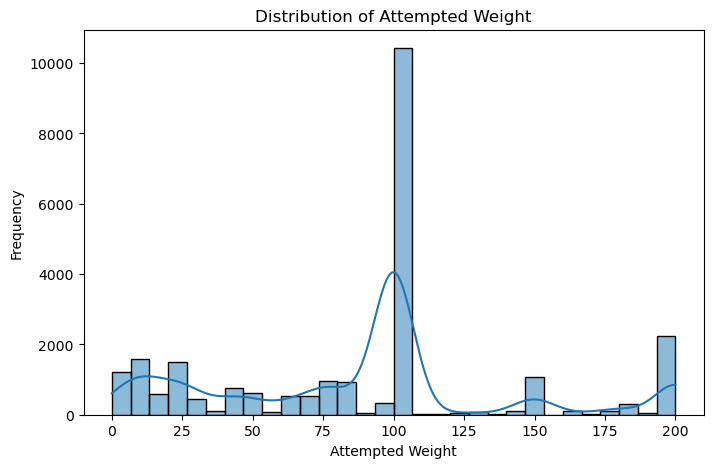

In [ ]:
# Plot distribution of attempted_weight
plt.figure(figsize=(8, 5))
sns.histplot(df['attempted_weight'], kde=True, bins=30)
plt.title("Distribution of Attempted Weight")
plt.xlabel("Attempted Weight")
plt.ylabel("Frequency")
plt.show()

Most students have an attempted weight around 100

In [ ]:
merged_df2.describe()['attempted_weight'] # 50th quartile and 75th quartile values are 100

count    20262.000000
mean       102.233027
std         48.653930
min          0.000000
25%         82.000000
50%        100.000000
75%        100.000000
max        200.000000
Name: attempted_weight, dtype: float64

Text(0.5, 0, '')

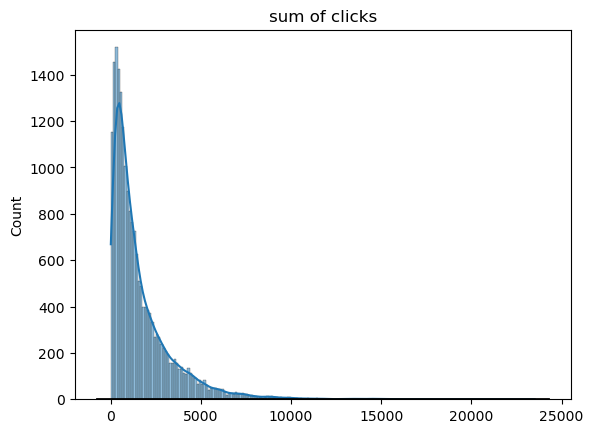

In [ ]:
# Plotting distribution for sum of clicks
fig, ax = plt.subplots()
sns.histplot(data=merged_df2,x='sum',kde=True)
sns.kdeplot(data=merged_df2,x='sum',color="k", linewidth=2)
ax.set_title('sum of clicks')
ax.set_xlabel("")

the shape appears to be **right-skewed**, which is commonly seen in **exponential distributions**. This means the majority of the data points are concentrated near the lower end (closer to zero), while a smaller number of observations extend toward the higher values.

let's take log of sum of total clicks and see

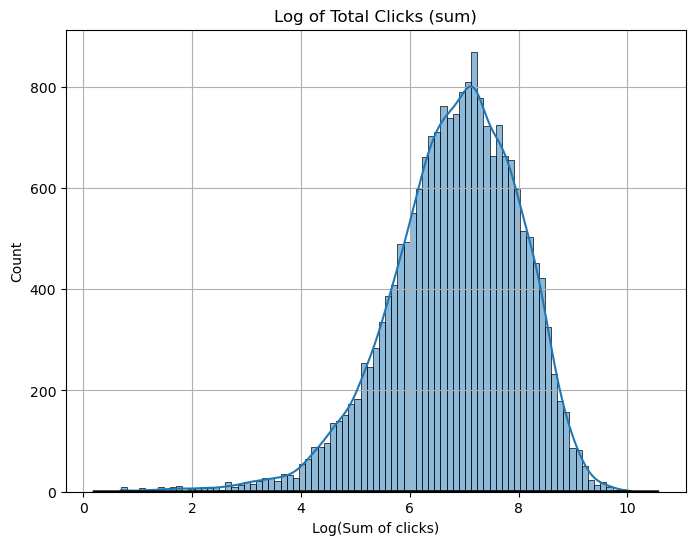

In [ ]:
import numpy as np

# Add a new column for log-transformed 'sum'
merged_df2['log_sum'] = np.log1p(merged_df2['sum'])

# Plot the distribution for log of sum
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=merged_df2, x='log_sum', kde=True, ax=ax)
sns.kdeplot(data=merged_df2, x='log_sum', color="k", linewidth=2, ax=ax)
ax.set_title('Log of Total Clicks (sum)')
ax.set_xlabel("Log(Sum of clicks)")
plt.grid(True)
plt.show()

- The log-transformed sum values now resemble a more normal distribution, as evident from the histogram.
- This transformation has successfully reduced the right skewness that was present in the original sum distribution.

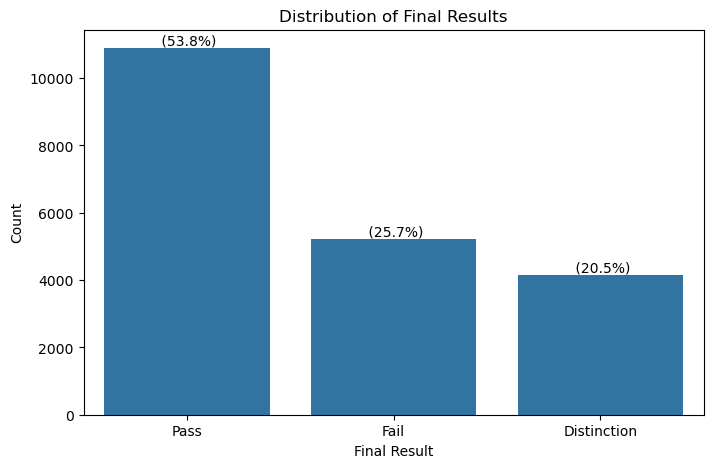

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='final_result', data=merged_df2)

#total count
total = len(merged_df2)

# Adding annotations here
for p in ax.patches:
    count = int(p.get_height())  # Get the count
    percentage = f'{(count / total * 100):.1f}%'  # Percentage calculation
    ax.annotate(f' ({percentage})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribution of Final Results")
plt.xlabel("Final Result")
plt.ylabel("Count")
plt.show()

### 1. The top 5 modules chosen by students

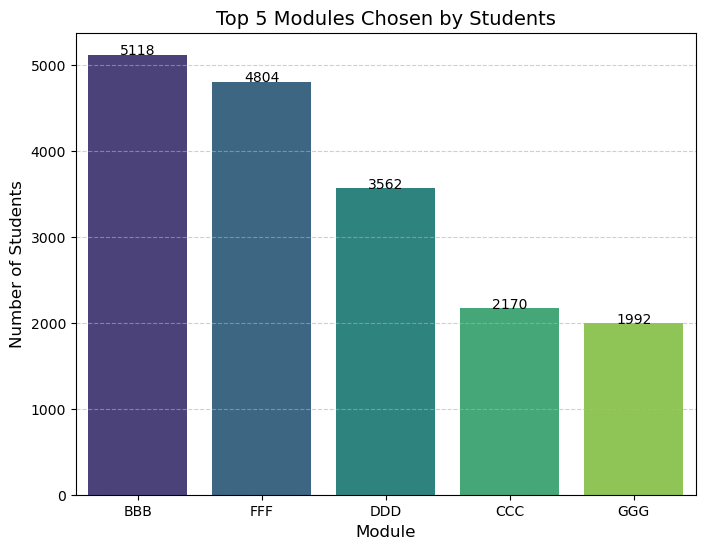

In [ ]:
# Finding the top 5 modules chosen by students
data1 = merged_df2[['code_module','id_student']]
data1 = data1.drop_duplicates()
top_modules = data1['code_module'].value_counts().head(5)

# Plotting the top 5 modules with the number of students on the Y-axis

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=top_modules.index, y=top_modules.values, palette="viridis")

# Adding values above each bar
for i, value in enumerate(top_modules.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)

plt.title("Top 5 Modules Chosen by Students", fontsize=14)
plt.xlabel("Module", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### 2. The top 5 modules with the highest average score

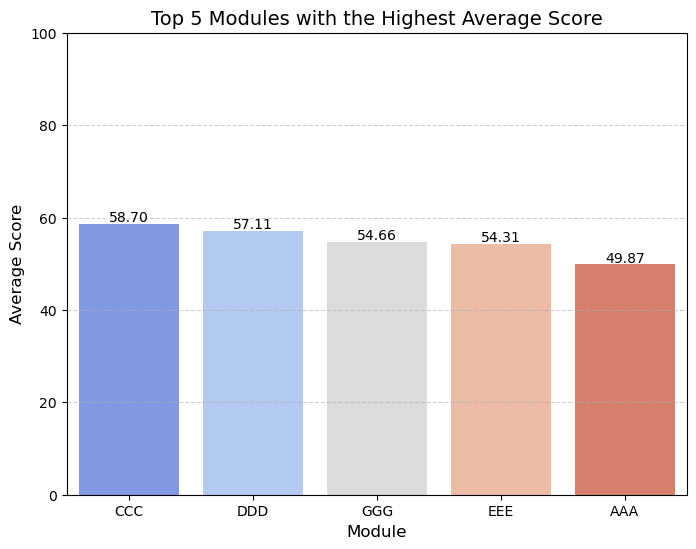

In [ ]:
# Calculating the top 5 modules with the highest average score
top_avg_score_modules = (
    merged_df2.groupby('code_module')['adjusted_mark']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=top_avg_score_modules.index,
    y=top_avg_score_modules.values,
    palette="coolwarm"
)
plt.title("Top 5 Modules with the Highest Average Score", fontsize=14)
plt.xlabel("Module", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding the values above each bar
for i, value in enumerate(top_avg_score_modules.values):
    plt.text(i, value + 0.5, f"{value:.2f}", ha='center', fontsize=10)

plt.show()

### 3. The top 5 modules with the lowest average score

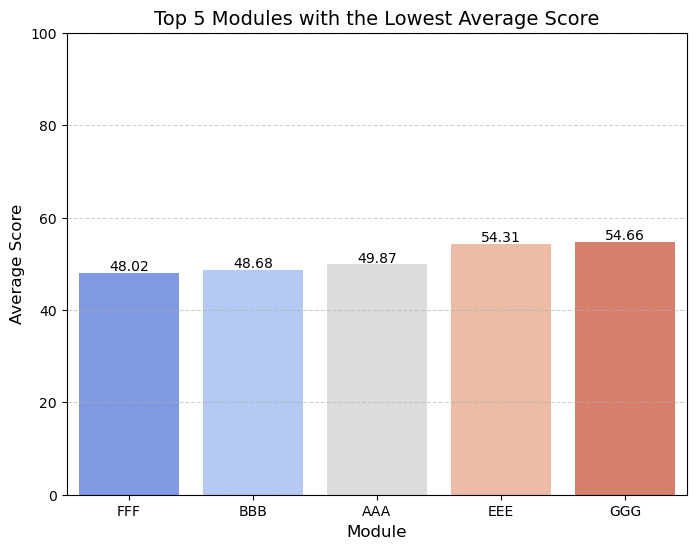

In [ ]:
# Calculating the top 5 modules with the lowest average score
lowest_avg_score_modules = (
    merged_df2.groupby('code_module')['adjusted_mark']
    .mean()
    .sort_values(ascending=True)
    .head(5)
)


plt.figure(figsize=(8, 6))
sns.barplot(
    x=lowest_avg_score_modules.index,
    y=lowest_avg_score_modules.values,
    palette="coolwarm"
)
plt.title("Top 5 Modules with the Lowest Average Score", fontsize=14)
plt.xlabel("Module", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding the values above each bar
for i, value in enumerate(lowest_avg_score_modules.values):
    plt.text(i, value + 0.5, f"{value:.2f}", ha='center', fontsize=10)

plt.show()

### 4. The top 5 modules with the most number of fails

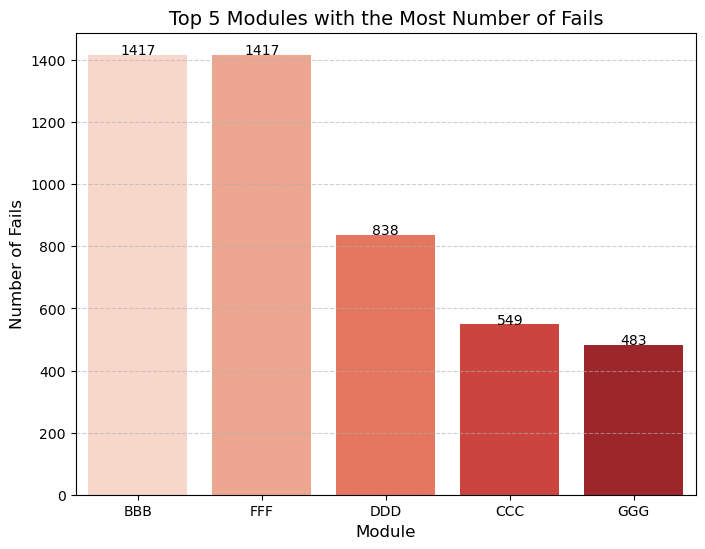

In [ ]:
# Calculating the top 5 modules with the most number of fails

data1 = merged_df2[merged_df2['final_result'] == 'Fail'][['code_module','id_student']]
data1 = data1.drop_duplicates()

most_fails_modules = (
    data1.groupby('code_module')
    .size()
    .sort_values(ascending=False)
    .head(5)
)


plt.figure(figsize=(8, 6))
sns.barplot(
    x=most_fails_modules.index,
    y=most_fails_modules.values,
    palette="Reds"
)
plt.title("Top 5 Modules with the Most Number of Fails", fontsize=14)
plt.xlabel("Module", fontsize=12)
plt.ylabel("Number of Fails", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding the values above each bar
for i, value in enumerate(most_fails_modules.values):
    plt.text(i, value + 1, f"{value}", ha='center', fontsize=10)

plt.show()

### 5. The age distribution of the students

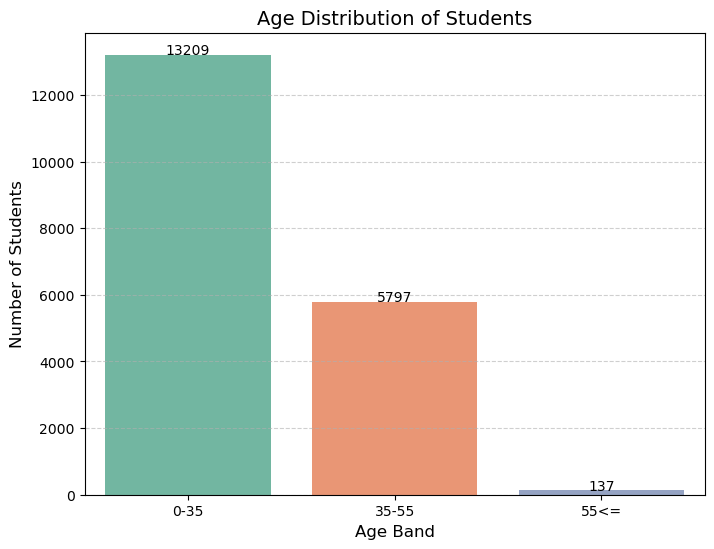

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the age distribution of students
data1 = merged_df2[['age_band','id_student']]
data1 = data1.drop_duplicates()
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='age_band', palette="Set2", order=data1['age_band'].value_counts().index)
plt.title("Age Distribution of Students", fontsize=14)
plt.xlabel("Age Band", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding the values above each bar
age_counts = data1['age_band'].value_counts()
for i, value in enumerate(age_counts):
    plt.text(i, value + 0.5, f"{value}", ha='center', fontsize=10)

plt.show()

## 6. The weekly activity patterns of the students' interaction with the VLE

In [ ]:
df_student_interaction['date'] = pd.to_numeric(df_student_interaction['date'], errors='coerce')

In [ ]:
#Creating a week column by clubbing consecutive 7 days
df_student_interaction['week'] = (df_student_interaction['date'] - df_student_interaction['date'].min()) // 7

In [ ]:
# taking the sum at week level to understand the weekly interaction
df_weekly = df_student_interaction.groupby('week')['sum_click'].sum().reset_index()

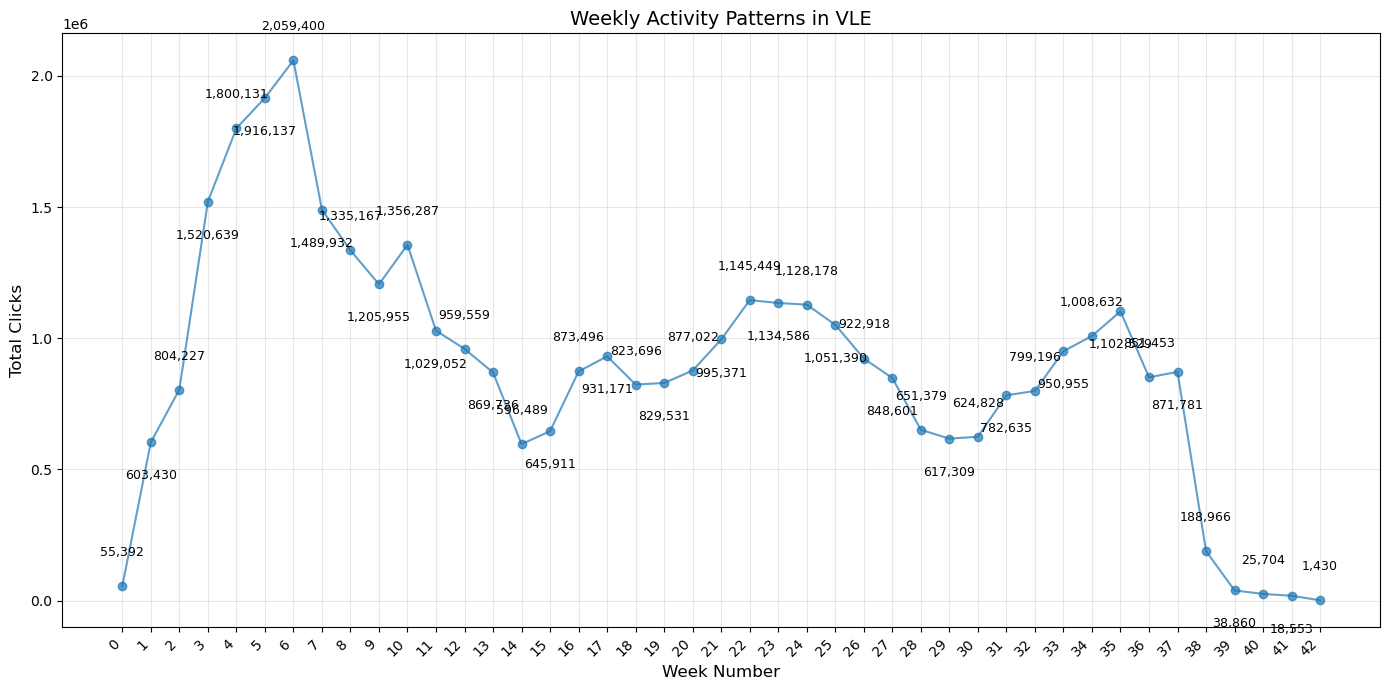

In [ ]:
# Plot the weekly activity as a time series
plt.figure(figsize=(14, 7))
plt.plot(df_weekly['week'], df_weekly['sum_click'], marker='o', linestyle='-', alpha=0.7)
plt.title('Weekly Activity Patterns in VLE', fontsize=14)
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Total Clicks', fontsize=12)
plt.xticks(df_weekly['week'], rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Annotate each point with its value
for i, v in enumerate(df_weekly['sum_click']):
    y_offset = 0.05 * max(df_weekly['sum_click'])  # Adjust y-offset dynamically
    if i % 2 == 0:
        plt.text(df_weekly['week'][i], v + y_offset, f"{v:,}", ha='center', va='bottom', fontsize=9)
    else:
        plt.text(df_weekly['week'][i], v - y_offset, f"{v:,}", ha='center', va='top', fontsize=9)

plt.grid(alpha=0.3)
plt.show()

### Hypothesis Testing:  Impact of VLE Interaction on Students' Grades


### Hypotheses

1. **Null Hypothesis (\(H_0\))**:
   - Students who interact more with the VLE (have clicks > median clicks) do not have significantly higher grades compared to those who interact less $$(\mu_1 - \mu_2 \leq 0)$$.

2. **Alternative Hypothesis (\(H_a\))**:
   - Students who interact more with the VLE (have clicks > median clicks) have significantly higher grades compared to those who interact less $$(\mu_1 - \mu_2 > 0)$$.



**Test Type**: One-sided independent t-test.

### Significance Level

- alpha = 0.05 : If \(p\)-value < 0.05, reject the null hypothesis.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


# Calculate the median of 'sum_click'
median_clicks = merged_df2['sum'].median()

# Divide students into two groups
high_interaction_group = merged_df2[merged_df2['sum'] > median_clicks]['adjusted_mark']
low_interaction_group = merged_df2[merged_df2['sum'] <= median_clicks]['adjusted_mark']

# Perform a one-sided t-test
result = ttest_ind(high_interaction_group, low_interaction_group, alternative='greater',equal_var=False)
ci = result.confidence_interval(confidence_level=0.95)

# Results
print(f"T-Statistic: {result[0]}")
print(f"P-Value: {result[1]}")
print('confidence interval 95%: ', ci)
p_value = result[1]


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence to suggest that high VLE interaction improves grades.")
else:
    print("Fail to reject the null hypothesis: There is no evidence to suggest that high VLE interaction improves grades.")

T-Statistic: 49.24588221214197
P-Value: 0.0
confidence interval 95%:  ConfidenceInterval(low=14.967164597047171, high=inf)
Reject the null hypothesis: There is evidence to suggest that high VLE interaction improves grades.


In [ ]:
high_interaction_group.mean()

59.99872148498021

In [ ]:
low_interaction_group.mean()

44.514341465729515

### Checking Correlation of adjusted_mark with the sum of VLE clicks

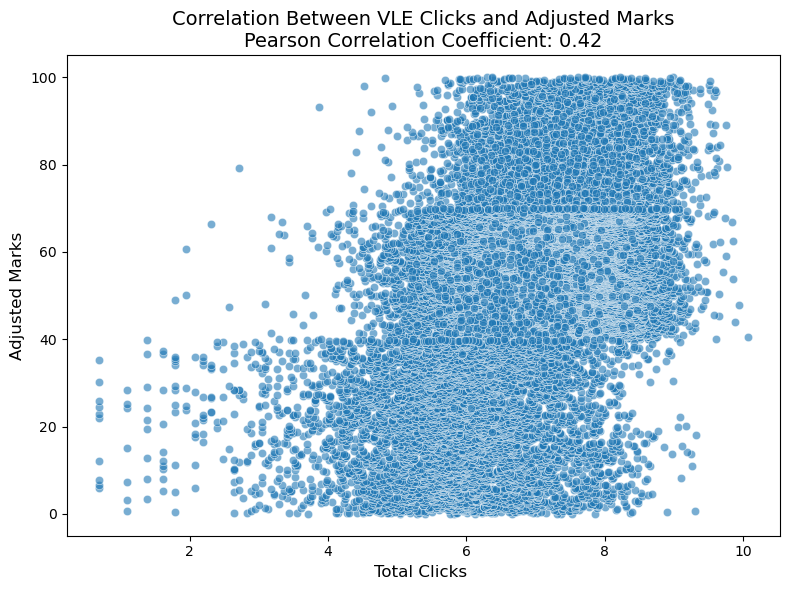

Pearson Correlation Coefficient: 0.42
P-value: 0.000e+00


In [ ]:

# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(merged_df2['log_sum'], merged_df2['adjusted_mark'])

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_sum', y='adjusted_mark', data=merged_df2, alpha=0.6)

# Add a title and labels
plt.title(f'Correlation Between VLE Clicks and Adjusted Marks\n'
          f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=14)
plt.xlabel('Total Clicks ', fontsize=12)
plt.ylabel('Adjusted Marks', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.3e}")

correlation between VLE clicks and `adjusted_mark` for the entire dataset found to be 0.42. But, when I plotted it for different modules,
It is found that module **DDD** has better correlation.

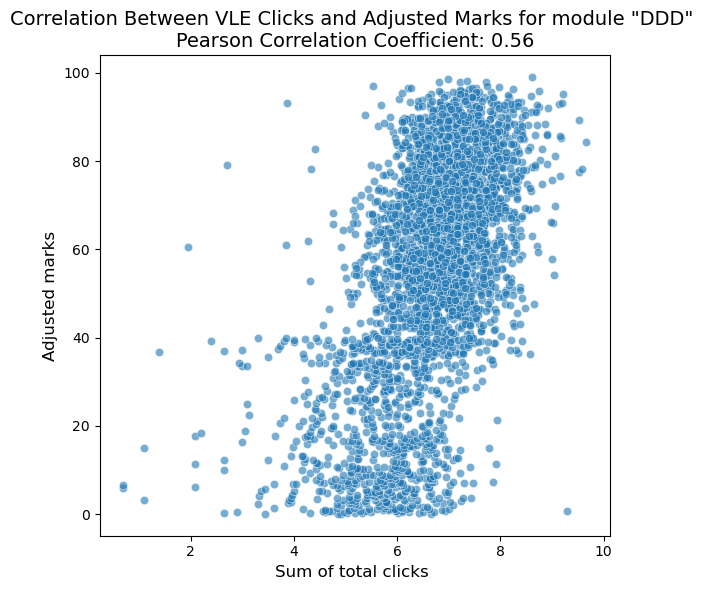

Pearson Correlation Coefficient: 0.56
P-value: 5.967e-293


In [ ]:

# Calculate the correlation coefficient
df_DDD = merged_df2[merged_df2['code_module'] =='DDD'].copy()
correlation_coefficient, p_value = pearsonr(df_DDD['log_sum'], df_DDD['adjusted_mark'])

# Plotting the scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='log_sum', y='adjusted_mark', data=df_DDD, alpha=0.6)

# Add a title and labels
plt.title(f'Correlation Between VLE Clicks and Adjusted Marks for module "DDD" \n'
          f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=14)
plt.xlabel('Sum of total clicks ', fontsize=12)
plt.ylabel('Adjusted marks', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.3e}")

Among all the modules, **DDD** seemed to have better correlation with `adjusted_mark`. Hence, moving forward I will be subsetting the
dataframe `merged_df2` to `df` having just **DDD** as `code_module`

In [ ]:
df = merged_df2[['code_module', 'code_presentation', 'sum', 'total_score*weight', 'attempted_weight', 'adjusted_mark', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band','log_sum' ]]

In [ ]:
df = df[df['code_module']=='DDD']

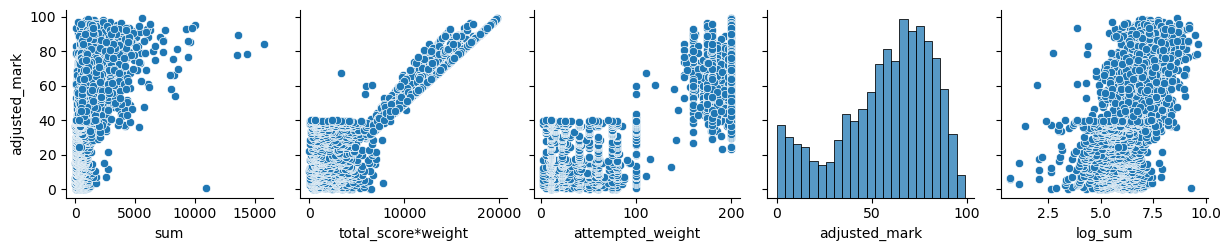

In [ ]:
_ = sns.pairplot(df,y_vars=["adjusted_mark"])

### Pearson's and spearman's Co-efficients

**For the numeric columns**

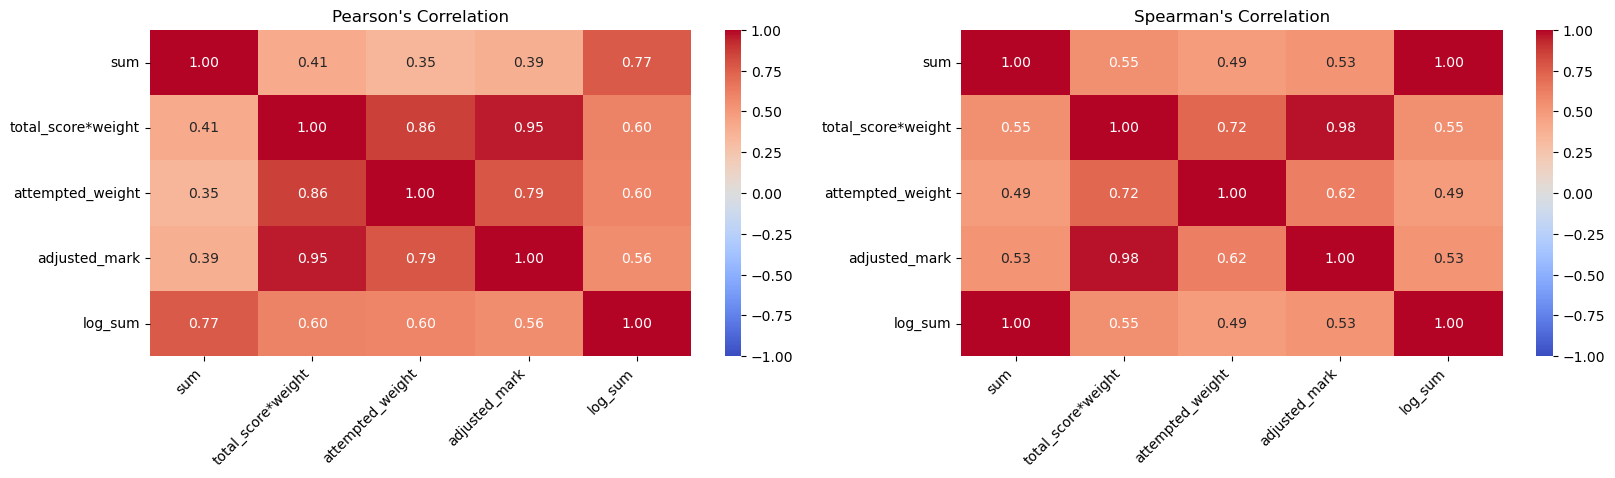

In [ ]:
p_oh_corr_matrix = df.corr(numeric_only=True) #pearson's correlation matric
s_oh_corr_matrix = df.corr(numeric_only=True,method="spearman") # spearman's correlation matrix

#Plotting heat map
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.heatmap(p_oh_corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",ax=axes[0],vmin=-1)
sns.heatmap(s_oh_corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",ax=axes[1],vmin=-1)

axes[0].set_title("Pearson's Correlation")
axes[1].set_title("Spearman's Correlation")

fig.set_figwidth(fig.get_figwidth() * 3)
fig.autofmt_xdate(rotation=45)

From here, we can only take `log_sum` as a independent variable to predict `adjusted_mark`. Other features like `total_score*weight` and
`attempted_weight`are highly correlated with adjusted_mark. (`adjusted_mark` is derived using these features)

<Axes: xlabel='log_sum', ylabel='adjusted_mark'>

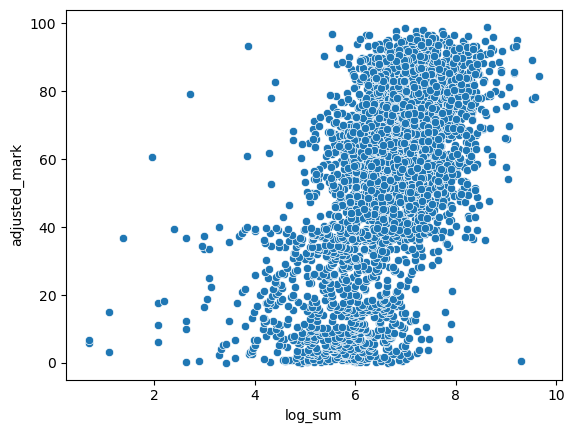

In [ ]:
#plotting log_sum against adjusted_mark

fig, axes = plt.subplots(nrows=1,ncols=1)
sns.scatterplot(df,x="log_sum",y="adjusted_mark",ax=axes)

**For categorical columns**

In [ ]:
df2 = pd.get_dummies(df,columns=['code_presentation', 'gender','age_band'],drop_first=True)

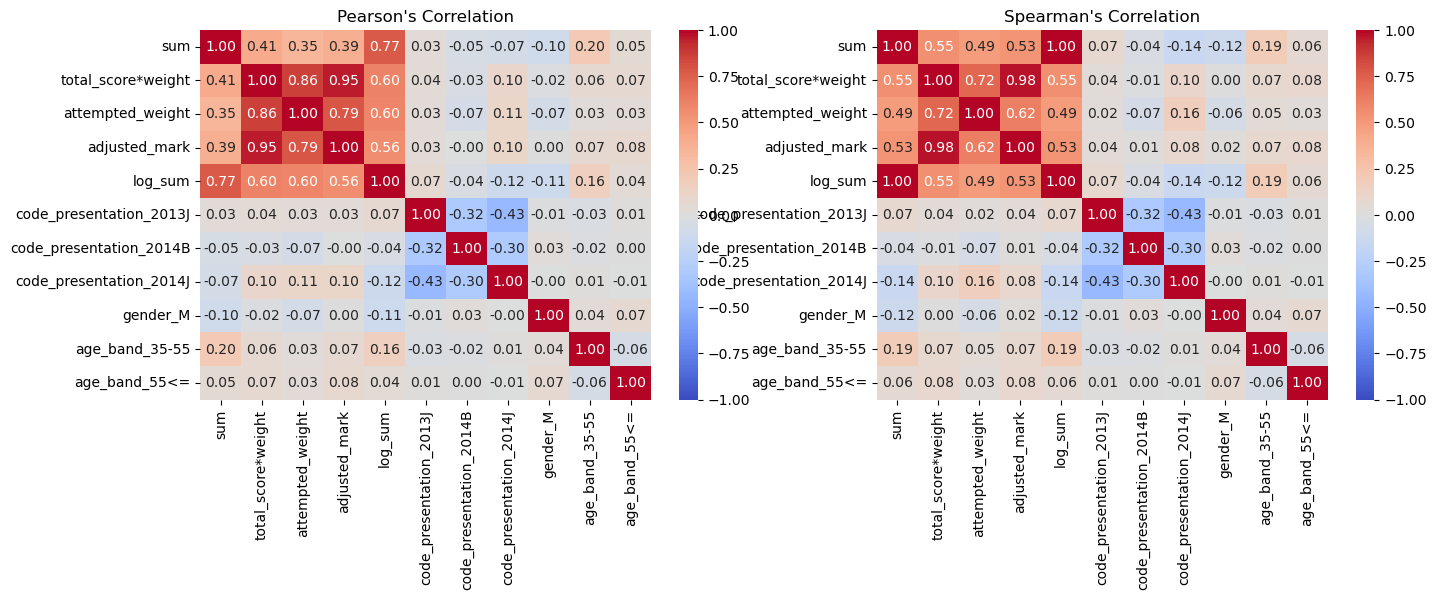

In [ ]:
p_corr = df2.corr(numeric_only=True)
s_corr = df2.corr(numeric_only=True,method="spearman")

fig, axes = plt.subplots(nrows=1,ncols=2)

sns.heatmap(p_corr,vmin=-1,annot=True,fmt=".2f",cmap="coolwarm",ax=axes[0])
axes[0].set_title("Pearson's Correlation")

sns.heatmap(s_corr,vmin=-1,annot=True,fmt=".2f",cmap="coolwarm",ax=axes[1])
axes[1].set_title("Spearman's Correlation")


fig.set_figwidth(fig.get_figwidth() * 2.5)

seems none of the categorical variables are correlated enough to considered for the regression analysis. So, I assume that regression analysis might not be a good fit to predict the scores

Now, I would try to predict the `final_result` using a Decision tree and see how well it performs

### Decision tree

In [ ]:
#I will proceed the classification per a single module, I'm selecting 'DDD' module
df_DDD = merged_df2[merged_df2['code_module']=='DDD']

In [ ]:
# Selecting the initial predictors based on my understanding
X = df_DDD[['sum', 'code_presentation', 'gender', 'age_band', 'attempted_weight', 'region', 'imd_band']]

#defining target variable
y = df_DDD['final_result']

# One-Hot Encoding for categorical features using pd.get_dummies()
X_encoded = pd.get_dummies(X, columns=['code_presentation', 'gender', 'age_band', 'region', 'imd_band'], drop_first=True)

# Encoding the target variable (final_result) into numeric labels
y_encoded = y.map({'Fail': 0, 'Pass': 1, 'Distinction': 2})


clf = DecisionTreeClassifier(max_depth=4,random_state=42)

# In order to select top 5 features, using RFE
rfe = RFE(estimator=clf, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_encoded, y_encoded)

# Printing selected features by RFE
selected_features = X_encoded.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)

# Filtering out the RFE identified features
X_selected = X_encoded[selected_features]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Training the classifier on the training data
res = clf.fit(X_train, y_train)

# Predicting target values for the test data
y_pred = clf.predict(X_test)

# using the predicted values, evaluating model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}\n")
# Printing classifivation report to see other evaluation metrics such as f1 score, recall and precision
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass', 'Distinction']))

Selected Features by RFE:
Index(['sum', 'attempted_weight', 'code_presentation_2014J', 'imd_band_40-50%',
       'imd_band_90-100%'],
      dtype='object')
Model Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

        Fail       0.98      0.87      0.92       184
        Pass       0.57      0.68      0.62       286
 Distinction       0.58      0.50      0.54       247

    accuracy                           0.67       717
   macro avg       0.71      0.68      0.69       717
weighted avg       0.68      0.67      0.67       717



- The model performs moderately well with an overall accuracy of 66.67%, but there is significant room for improvement, particularly in
predicting the Pass and “Distinction” class.

- The selected features (sum, attempted_weight, etc.) are important for predicting student outcomes. This suggests that engagement
  with the virtual learning environment (log_sum), the weight of assessments attempted, and socio-economic indicators (imd_band) play
  key roles in determining final results.
                                                                                                   

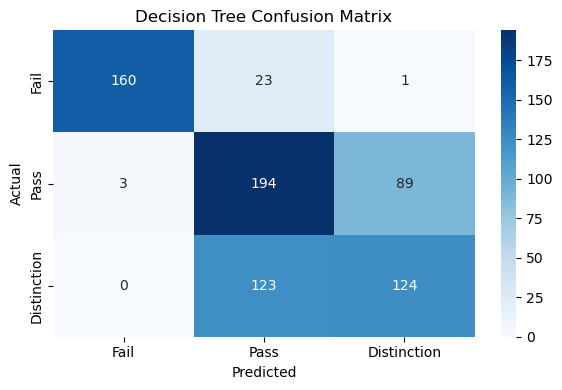

In [ ]:
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Fail', 'Pass', 'Distinction']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

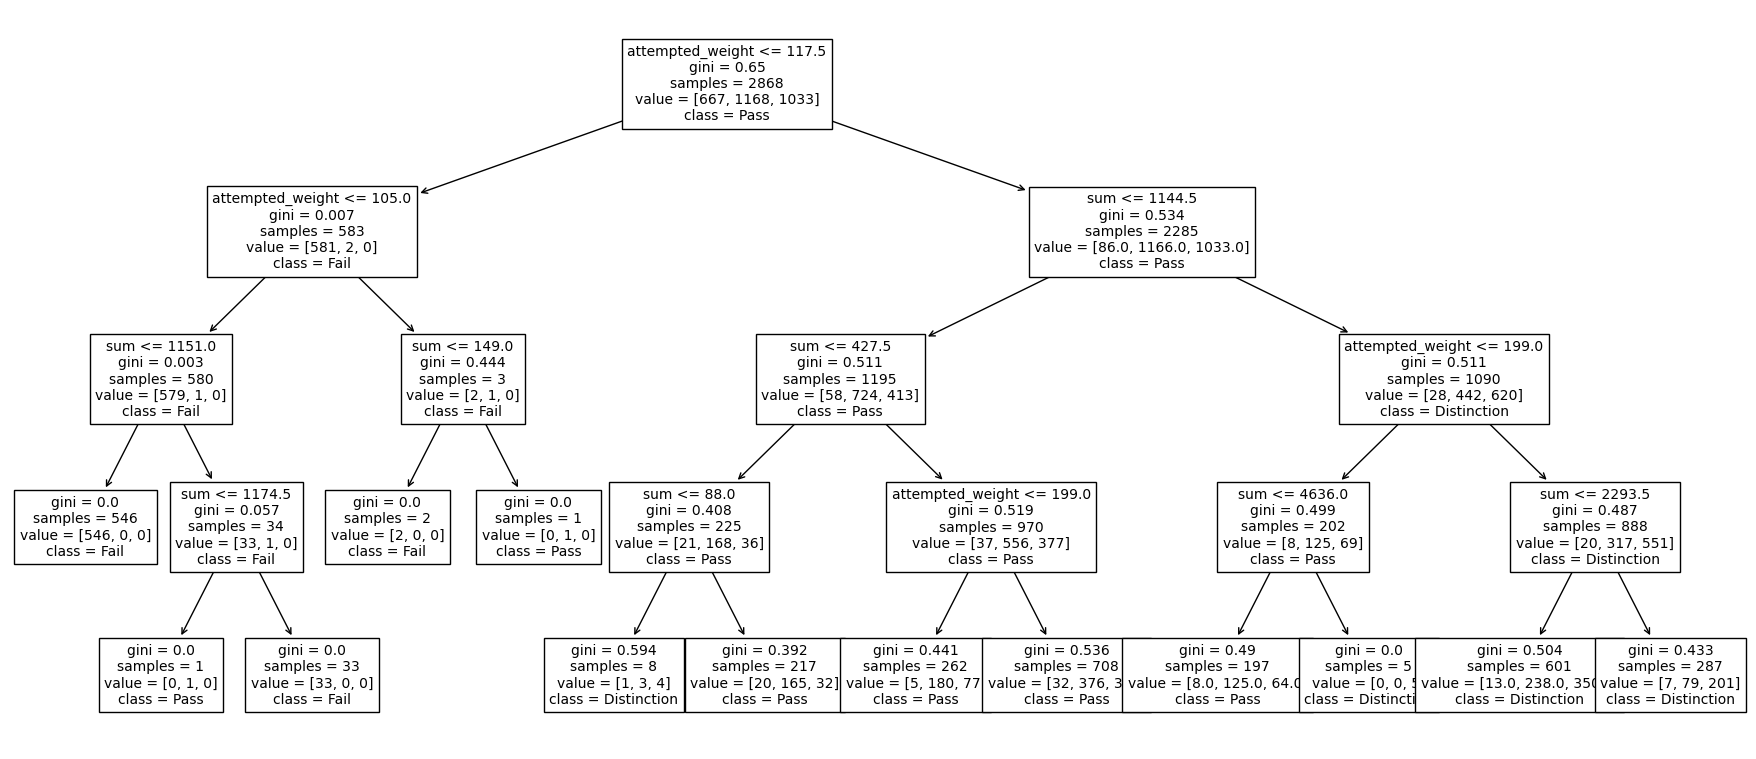

In [ ]:
# Producing decision tree

fig, ax = plt.subplots(nrows=1,ncols=1)

_ = tree.plot_tree(res, feature_names=X_selected.columns,class_names=['Fail', 'Pass', 'Distinction'],ax=ax, fontsize=10)

fig.set_figheight(fig.get_figheight() * 2)
fig.set_figwidth(fig.get_figwidth() * 3.5)

**Summary**:


This report analyzed the impact of the Virtual Learning Environment (VLE) at the Open University, demonstrating that increased VLE
interaction correlates with higher student grades. Hypothesis testing confirmed the VLE’s effectiveness, while exploratory data analysis highlighted that modules like ‘BBB’ and ‘FFF’ have high enrollments but also high failure rates, suggesting areas for curriculum improvement.

The Decision Tree Classifier effectively predicted ‘Pass’ and ‘Fail’ outcomes but was less reliable for the ‘Distinction’ category, likely due to overlapping features and limited data on high-achievers. Based on these findings, it is recommended that the university enhance support for at-risk students, particularly in underperforming modules, and continuously refine predictive models to improve accuracy.

By further integrating these actionable insights, the Open University can continue to leverage its VLE to enhance educational accessibility and effectiveness, ensuring that students not only remain engaged but also achieve their full academic potential.
